In [1]:
from pathlib import Path
import pandas as pd
from alphalens.tears import create_summary_tear_sheet
from alphalens.utils import get_clean_factor_and_forward_returns

In [2]:
# GLOBAL SETTINGS

# Directories
model_dataDir = 'DATA/MODELDATA/'
model_plot_dataDir = 'DATA/MODELRESULTS/'

# Time
START = 2021
END = 2022



#Helpers
idx = pd.IndexSlice



In [3]:
# Helper Functions
def get_trade_prices(start, stop):
    model_mdf = pd.read_csv(model_dataDir + 'ModelData.csv')
    model_mdf.rename(columns={'Unnamed: 0': 'Dates'}, inplace=True)
    model_mdf['Dates'] = pd.to_datetime(model_mdf['Dates'])
    model_mdf.set_index(['Dates', 'Coin'], inplace=True)
    model_mdf = model_mdf.loc[:,'Open']
    #model_mdf = model_mdf.loc[idx[Coin, str(START):str(END)], 'Open']
    prices = model_mdf.unstack('Coin').sort_index().shift(-1).tz_localize('UTC')
    
    return prices



def get_best_alpha(scores):
    return scores.groupby('alpha').ic.mean().idxmax()


def get_factor(predictions):
    return (predictions.unstack('Coin')
            .dropna(how='all')
            .stack()
            .tz_localize('UTC', level='Dates')
            .sort_index())    

In [4]:
# Load the Model Results Data
lr_predictions = pd.read_hdf(f'{model_dataDir}lr_model_predictions.h5', 'lr/predictions')
ridge_scores = pd.read_hdf(f'{model_dataDir}Ridge_Scores.h5', 'ridge/scores')
ridge_predictions = pd.read_hdf(f'{model_dataDir}Ridge_Predictions.h5', 'ridge/predictions')
lasso_scores = pd.read_hdf(f'{model_dataDir}Lasso_Scores.h5', 'lasso/scores')
lasso_predictions = pd.read_hdf(f'{model_dataDir}Lasso_Predictions.h5', 'lasso/predictions')

# Load the OHLV Price data
#model_mdf = pd.read_csv(model_dataDir + 'ModelData.csv')
#model_mdf.rename(columns={'Unnamed: 0': 'Dates'}, inplace=True)
#model_mdf['Dates'] = pd.to_datetime(model_mdf['Dates'])
#model_mdf.set_index(['Dates', 'Coin'], inplace=True)
#model_mdf = model_mdf.loc[:,'Open':'Volume']
#prices = model_mdf.unstack('Coin').sort_index().shift(-1).tz_localize('UTC')

In [5]:
# Now we will check the Alpha and Beta metrics of the signals found by our models in the prior step

In [6]:
# From Linear Regression
lr_factor = get_factor(lr_predictions.predicted.swaplevel())
lr_factor.head()

Dates                      Coin                 
2021-01-09 00:00:00+00:00  basic-attention-token    0.059398
                           binancecoin              0.074714
                           bitcoin                  0.028835
                           bitcoin-cash             0.023495
                           bitcoin-cash-sv         -0.002483
dtype: float64

In [9]:
trade_prices = get_trade_prices(START, END)
#trade_prices.info()

In [12]:
#trade_prices = trade_prices.loc['2021':]
trade_prices = trade_prices.loc[str(START):]

In [13]:
trade_prices.head()

Coin,basic-attention-token,binancecoin,bitcoin,bitcoin-cash,bitcoin-cash-sv,bittorrent-old,cardano,celsius-degree-token,chainlink,cosmos,...,nexo,okb,quant-network,ripple,stellar,tezos,theta-token,tron,vechain,zcash
Dates,,,,,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00+00:00,0.205343,37.503464,29382.121100,339.711526,163.334378,0.000300,0.174338,5.561717,11.732297,5.713274,...,0.582822,9.393995,11.225961,0.234806,0.132464,2.011738,2.119562,0.026994,0.019236,57.960370
2021-01-02 00:00:00+00:00,0.204712,38.252001,33611.431863,363.455141,164.232060,0.000315,0.178057,6.115377,12.171984,5.408505,...,0.685575,8.214432,12.413806,0.225612,0.127765,2.003735,2.374730,0.027402,0.020298,58.446835
2021-01-03 00:00:00+00:00,0.226148,41.512179,33254.268233,433.474317,181.197682,0.000327,0.226212,6.473148,14.525525,6.046341,...,0.642703,7.983062,11.744472,0.239294,0.148191,2.254962,2.208618,0.030824,0.026069,62.345988
2021-01-04 00:00:00+00:00,0.223847,39.810655,31341.982584,402.743345,163.984933,0.000297,0.216092,5.908621,13.422239,5.800991,...,0.611879,7.238173,11.098990,0.231002,0.158173,2.206657,2.082054,0.028087,0.024352,58.233601
2021-01-05 00:00:00+00:00,0.231677,41.033756,35324.129280,428.929500,170.090780,0.000307,0.267811,6.127145,14.755069,6.030725,...,0.612886,7.432542,12.824485,0.228446,0.210890,2.403575,2.233246,0.028487,0.029294,60.528660


In [14]:
trade_prices.tail()

Coin,basic-attention-token,binancecoin,bitcoin,bitcoin-cash,bitcoin-cash-sv,bittorrent-old,cardano,celsius-degree-token,chainlink,cosmos,...,nexo,okb,quant-network,ripple,stellar,tezos,theta-token,tron,vechain,zcash
Dates,,,,,,,,,,,,,,,,,,,,,
2022-02-02 00:00:00+00:00,0.818450,366.877829,36997.768400,277.322132,89.620881,0.002186,1.034056,2.396534,15.673184,26.189285,...,1.961025,20.911036,119.694243,0.604969,0.193273,3.756410,2.737803,0.059010,0.052079,98.182877
2022-02-03 00:00:00+00:00,0.826654,371.763307,37372.204251,278.261992,90.035985,0.002230,1.055095,2.477254,16.105255,29.068539,...,2.060602,21.079994,135.263163,0.610741,0.195183,3.722347,2.791534,0.060765,0.052513,99.948187
2022-02-04 00:00:00+00:00,0.943305,418.485013,41500.882943,307.037346,96.346083,0.002267,1.142926,2.775594,17.945955,31.832879,...,2.222571,22.476378,135.901175,0.672715,0.213107,3.990543,3.321401,0.064447,0.060167,115.028496
2022-02-05 00:00:00+00:00,0.930901,415.766181,41606.470823,324.390633,98.139083,0.002282,1.122163,2.714192,17.879033,31.305135,...,2.207130,22.073839,131.384619,0.671100,0.221691,3.917341,3.472078,0.065465,0.059553,124.280985
2022-02-06 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Get forward returns and Quantiles
lr_factor_data = get_clean_factor_and_forward_returns(factor=lr_factor,
                                                      prices=trade_prices,
                                                      quantiles=5,
                                                      #periods=(1, 7, 14, 30, 60, 90))
                                                      periods=(1, 7, 14, 30))

lr_factor_data.info()

Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 14196 entries, (Timestamp('2021-01-09 00:00:00+0000', tz='UTC', freq='C'), 'basic-attention-token') to (Timestamp('2022-01-07 00:00:00+0000', tz='UTC', freq='C'), 'zcash')
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   1D               14196 non-null  float64
 1   7D               14196 non-null  float64
 2   14D              14196 non-null  float64
 3   30D              14196 non-null  float64
 4   factor           14196 non-null  float64
 5   factor_quantile  14196 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 719.4+ KB


Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,-0.220643,0.090508,-0.014867,0.027526,2912,20.512821
2,-0.128998,0.103125,0.000738,0.024469,2912,20.512821
3,-0.116624,0.109344,0.007871,0.024660,2548,17.948718
4,-0.099503,0.122293,0.014434,0.025213,2912,20.512821
5,-0.086769,0.249492,0.028102,0.029442,2912,20.512821


Returns Analysis


,1D,7D,14D,30D
Ann. alpha,1.821,1.256,1.160,0.890
beta,-0.014,0.156,0.211,0.208
Mean Period Wise Return Top Quantile (bps),34.566,40.763,46.408,49.556
Mean Period Wise Return Bottom Quantile (bps),-28.778,-42.621,-41.753,-35.754
Mean Period Wise Spread (bps),63.344,81.892,87.042,87.597


Information Analysis


,1D,7D,14D,30D
IC Mean,0.043,0.075,0.113,0.168
IC Std.,0.196,0.196,0.219,0.242
Risk-Adjusted IC,0.218,0.381,0.514,0.695
t-stat(IC),4.158,7.277,9.809,13.252
p-value(IC),0.000,0.000,0.000,0.000
IC Skew,-0.104,0.126,0.273,-0.232
IC Kurtosis,-0.241,-0.231,-0.164,-0.398


Turnover Analysis


,1D,7D,14D,30D
Quantile 1 Mean Turnover,0.336,0.611,0.694,0.743
Quantile 2 Mean Turnover,0.567,0.732,0.769,0.779
Quantile 3 Mean Turnover,0.650,0.785,0.804,0.806
Quantile 4 Mean Turnover,0.582,0.751,0.766,0.773
Quantile 5 Mean Turnover,0.354,0.626,0.680,0.736


,1D,7D,14D,30D
Mean Factor Rank Autocorrelation,0.741,0.312,0.2,0.096


<Figure size 432x288 with 0 Axes>

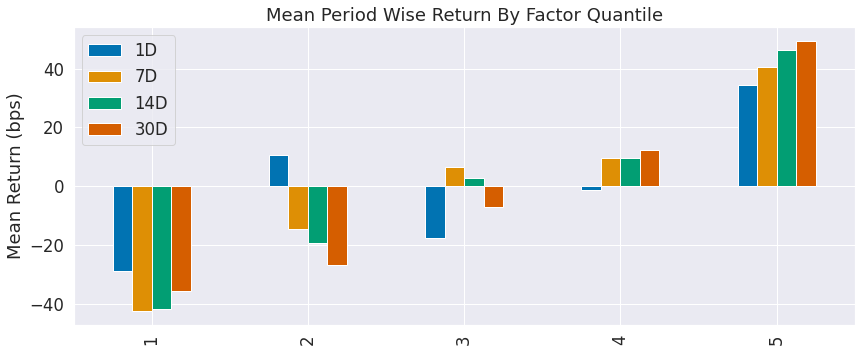

In [16]:
create_summary_tear_sheet(lr_factor_data);

In [17]:
# From Ridge
best_ridge_alpha = get_best_alpha(ridge_scores)
ridge_predictions = ridge_predictions[ridge_predictions.alpha==best_ridge_alpha].drop('alpha', axis=1)

In [18]:
ridge_factor = get_factor(ridge_predictions.predicted.swaplevel())
ridge_factor.head()

Dates                      Coin                 
2021-01-09 00:00:00+00:00  basic-attention-token    0.024753
                           binancecoin              0.032178
                           bitcoin                  0.024538
                           bitcoin-cash             0.009328
                           bitcoin-cash-sv         -0.002591
dtype: float64

In [19]:
ridge_factor_data = get_clean_factor_and_forward_returns(factor=ridge_factor,
                                                         prices=trade_prices,
                                                         quantiles=5,
                                                         periods=(1, 7, 14, 30))
ridge_factor_data.info()

Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 14196 entries, (Timestamp('2021-01-09 00:00:00+0000', tz='UTC', freq='C'), 'basic-attention-token') to (Timestamp('2022-01-07 00:00:00+0000', tz='UTC', freq='C'), 'zcash')
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   1D               14196 non-null  float64
 1   7D               14196 non-null  float64
 2   14D              14196 non-null  float64
 3   30D              14196 non-null  float64
 4   factor           14196 non-null  float64
 5   factor_quantile  14196 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 719.4+ KB


Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,-0.133291,0.046045,-0.012398,0.017028,2912,20.512821
2,-0.084093,0.054642,-0.003259,0.014261,2912,20.512821
3,-0.070683,0.060534,0.000770,0.014126,2548,17.948718
4,-0.062123,0.067387,0.004486,0.014170,2912,20.512821
5,-0.054534,0.115890,0.011532,0.015678,2912,20.512821


Returns Analysis


,1D,7D,14D,30D
Ann. alpha,1.734,1.468,1.290,0.962
beta,0.005,0.197,0.246,0.263
Mean Period Wise Return Top Quantile (bps),34.911,50.388,53.379,51.583
Mean Period Wise Return Bottom Quantile (bps),-24.383,-44.696,-42.290,-43.068
Mean Period Wise Spread (bps),59.294,93.423,95.150,94.750


Information Analysis


,1D,7D,14D,30D
IC Mean,0.052,0.101,0.145,0.195
IC Std.,0.202,0.200,0.216,0.246
Risk-Adjusted IC,0.259,0.505,0.672,0.792
t-stat(IC),4.937,9.642,12.830,15.110
p-value(IC),0.000,0.000,0.000,0.000
IC Skew,-0.166,-0.286,-0.066,-0.414
IC Kurtosis,-0.084,0.263,-0.404,-0.166


Turnover Analysis


,1D,7D,14D,30D
Quantile 1 Mean Turnover,0.343,0.585,0.649,0.745
Quantile 2 Mean Turnover,0.555,0.728,0.765,0.784
Quantile 3 Mean Turnover,0.641,0.773,0.784,0.788
Quantile 4 Mean Turnover,0.553,0.722,0.748,0.768
Quantile 5 Mean Turnover,0.344,0.584,0.639,0.727


,1D,7D,14D,30D
Mean Factor Rank Autocorrelation,0.735,0.395,0.276,0.118


<Figure size 432x288 with 0 Axes>

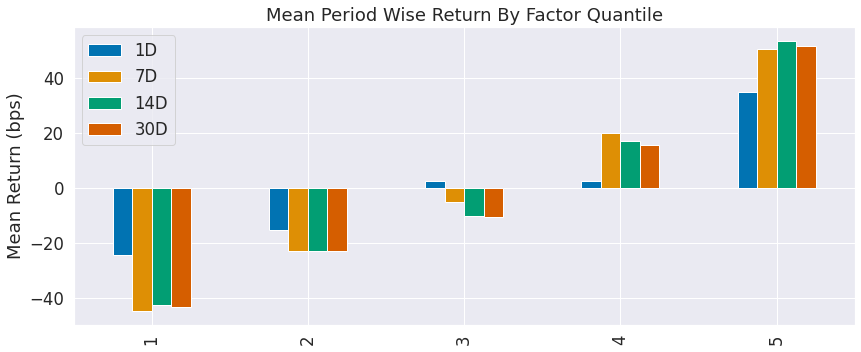

In [20]:
create_summary_tear_sheet(ridge_factor_data);

In [21]:
# From Lasso
best_lasso_alpha = get_best_alpha(lasso_scores)
lasso_predictions = lasso_predictions[lasso_predictions.alpha==best_lasso_alpha].drop('alpha', axis=1)

In [ ]:
lasso_factor = get_factor(lasso_predictions.predicted.swaplevel())
lasso_factor.head()

In [ ]:
lasso_factor_data = get_clean_factor_and_forward_returns(factor=lasso_factor,
                                                      prices=trade_prices,
                                                      quantiles=5,
                                                      periods=(1, 7, 14, 30))
lasso_factor_data.info()

In [ ]:
create_summary_tear_sheet(lasso_factor_data);